# Loan Application Status Prediction

# Project Description

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.

# Independent Variables:

1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases

2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions

3.	Married - This refers to applicant being in a state of matrimony

4.	Dependents - This refres to persons who depends on the applicants for survival
                                                                     
5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university

6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer

7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.
                                                                 
8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.

9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.
    
10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant

11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.

12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.

13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.
    
You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 

# Dataset Link

•	https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Loan%20Application%20Status/loan_prediction.csv

# Import the needed libraries for data preprocessing, model building and evaluation of classification models

In [22]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler, MinMaxScaler,PowerTransformer,QuantileTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier,AdaBoostClassifier, ExtraTreesClassifier
from sklearn.impute import SimpleImputer
from scipy.stats import zscore,boxcox
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,precision_score,recall_score,roc_curve,auc,r2_score,roc_auc_score

# Read the input dataset and display the first 5 records from the dataset using head() method

In [24]:
loandf=pd.read_csv(r'C:\Users\KIRUTHIKA\OneDrive\Documents\PG Program in Data Science Machine Learning and Neural Network\Internship\Datasets\loan_prediction.csv')
loandf.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Get the information about the dataset using info() method

In [26]:
loandf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


The info method shows that there are null records present in the dataset and the mixed datatypes of float64 and object type data present in the dataset.

# Get the shape of the dataset using shape method

In [29]:
loandf.shape

(614, 13)

# Check for the null values present in the dataset using isnull() method in pandas

In [35]:
loandf.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

It is clear from the above result that here are null records present in the dataset.

# Check for the duplicate record present in the dataset using duplicated() method in pandas

In [39]:
loandf.duplicated().sum()

0

# Apply scikit learn SimpleImputer to impute the value for null records

In [42]:
columns=['Gender','Married','Dependents','Self_Employed']
si=SimpleImputer(strategy='most_frequent')
loandf[columns]=si.fit_transform(loandf[columns])

In [44]:
columns_to_impute=['LoanAmount','Loan_Amount_Term','Credit_History']
si1=SimpleImputer(strategy='mean')
loandf[columns_to_impute]=si1.fit_transform(loandf[columns_to_impute])

In [46]:
loandf.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Get the statistical summary of the data using describe() method

In [230]:
loandf.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


The observation from the above statistical summary data are:

1, The value of the Mean is greater than the median for the columns ApplicantIncome, CoapplicantIncome and LoanAmount shows that there are right skewness present in the dataset.

2, The count value for all the columns are same and it is same the dataset row count so there no null records present in the dataset.

3, The value of maximum value for all the columns is higher than the 75th percentile of all the columns shows that there are outliers present in the dataset.

# Barplot to show the relationship between the property area and loan amount for the loan status

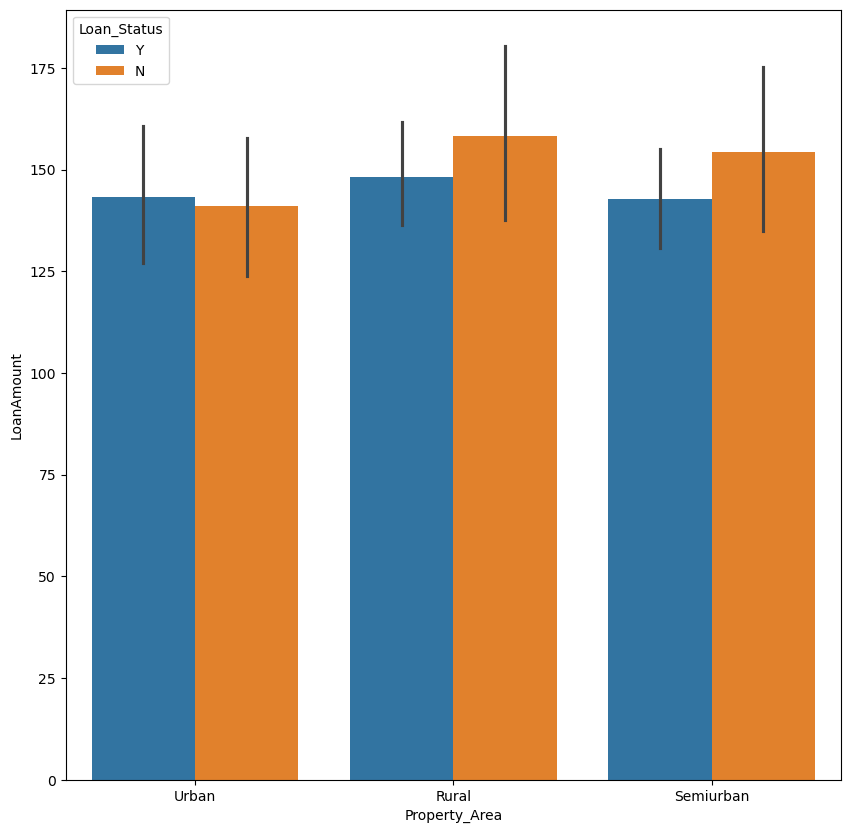

In [51]:
plt.figure(figsize=(10,10))
sns.barplot(loandf,x='Property_Area',y='LoanAmount',hue='Loan_Status',dodge=True)
plt.show()

It is clear from the above plot that the rural area have higher loan comapred to other areas.

# Barplot to show the relationship between the credit history and loan amount for the loan status

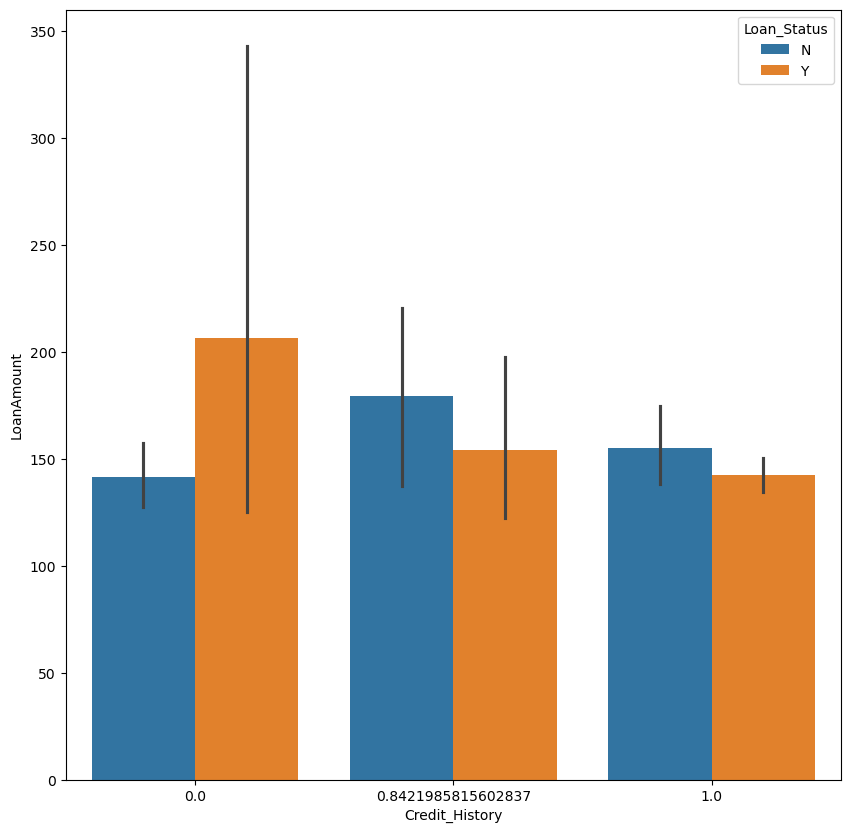

In [55]:
plt.figure(figsize=(10,10))
sns.barplot(loandf,x='Credit_History',y='LoanAmount',hue='Loan_Status',dodge=True)
plt.show()

It is clear from the above plot that the people with the credit history value of 0 are given maximum loan amount.

# Scatterplot to show the relationship between Applicant Income and Loan amount with Loan status

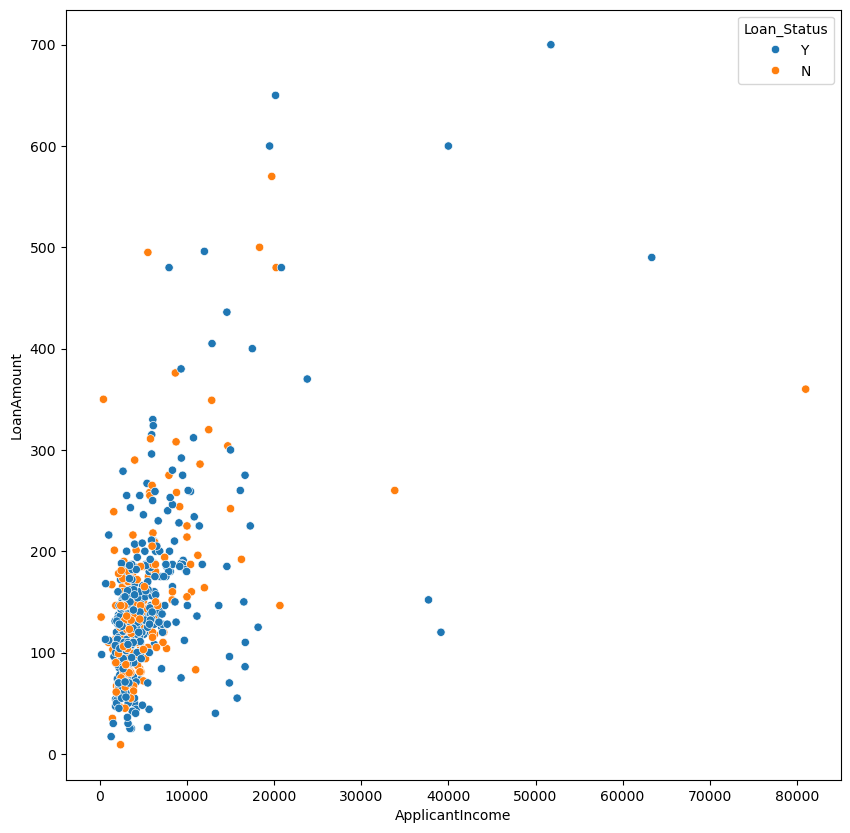

In [60]:
plt.figure(figsize=(10,10))
sns.scatterplot(loandf,x='ApplicantIncome',y='LoanAmount',hue='Loan_Status')
plt.show()

The above plot shows that the applicant income range between 1000 to 20000 are given loan amount of upto 400 and as the applicant income increases the loan amount also increases shows that the applicant with the higher income are eligible for higher loan amount.

# Categorical plot to show the relationship between the education of the applicant and loan amount for the self employed people and loan status

<Figure size 1000x1000 with 0 Axes>

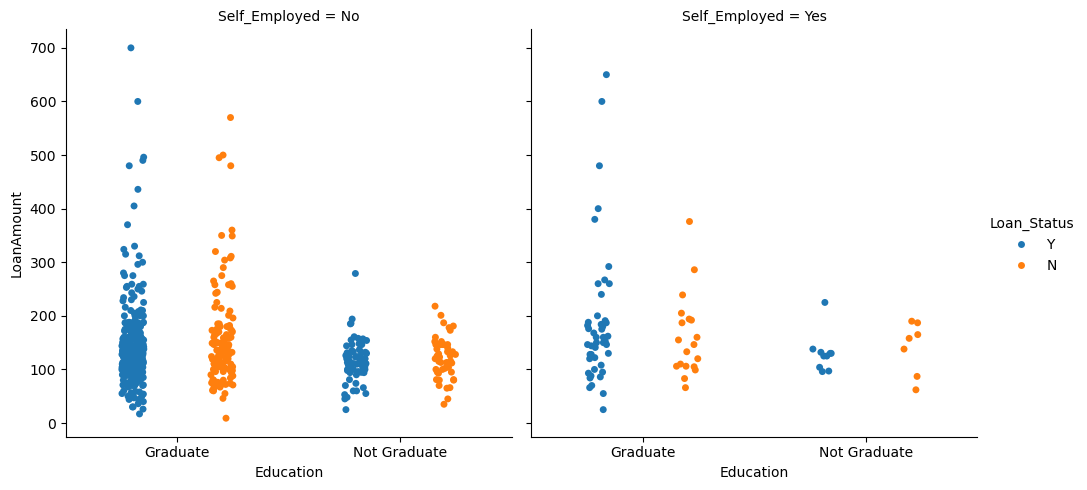

In [64]:
plt.figure(figsize=(10,10))
sns.catplot(loandf,x='Education',y='LoanAmount',hue='Loan_Status',col='Self_Employed',dodge=True)
plt.show()

It is clear from the above plot that the graduates are given more loan compared to non graduate people.

# Categorical plot to show the relationship between the Marriage status of the applicant and loan amount for both male and female with the loan status

<Figure size 1000x1000 with 0 Axes>

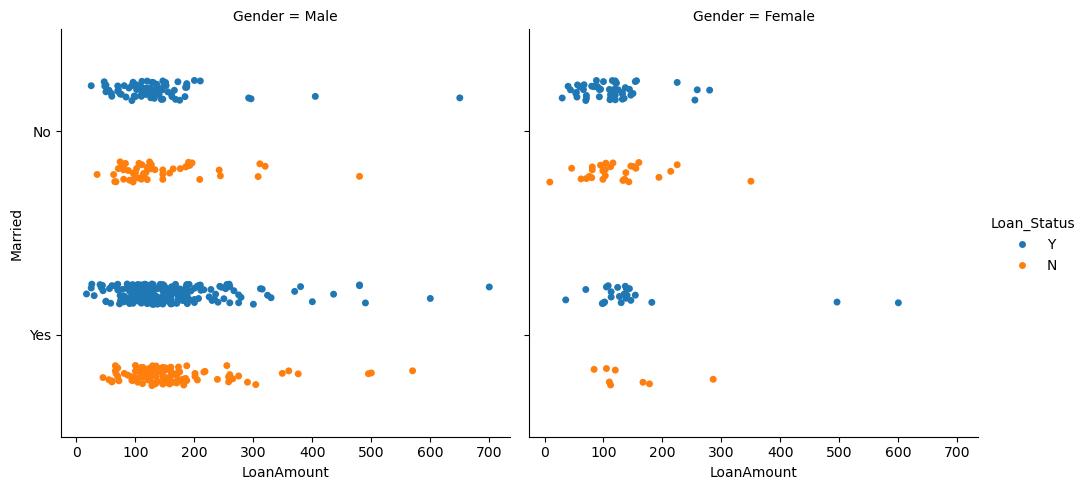

In [69]:
plt.figure(figsize=(10,10))
sns.catplot(loandf,x='LoanAmount',y='Married',hue='Loan_Status',col='Gender',dodge=True)
plt.show()

The above plot shows that the male applicant with Married status are given more loan.

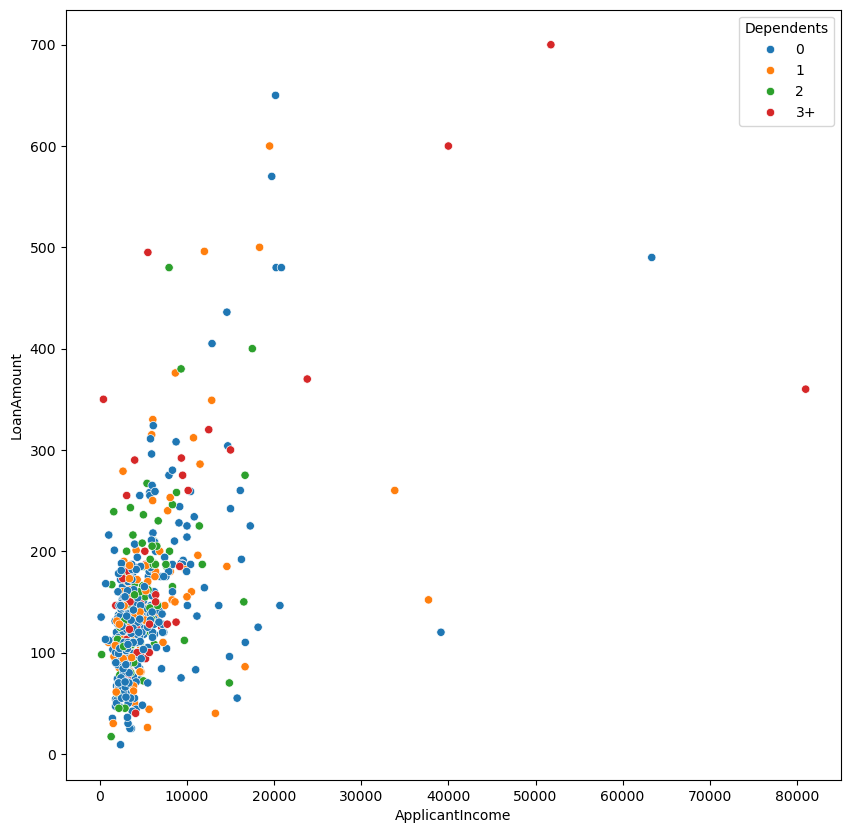

In [239]:
plt.figure(figsize=(10,10))
sns.scatterplot(loandf,x='ApplicantIncome',y='LoanAmount',hue='Dependents')
plt.show()

# Barplot to show the relationship between loan amount term and loan amount for loan status

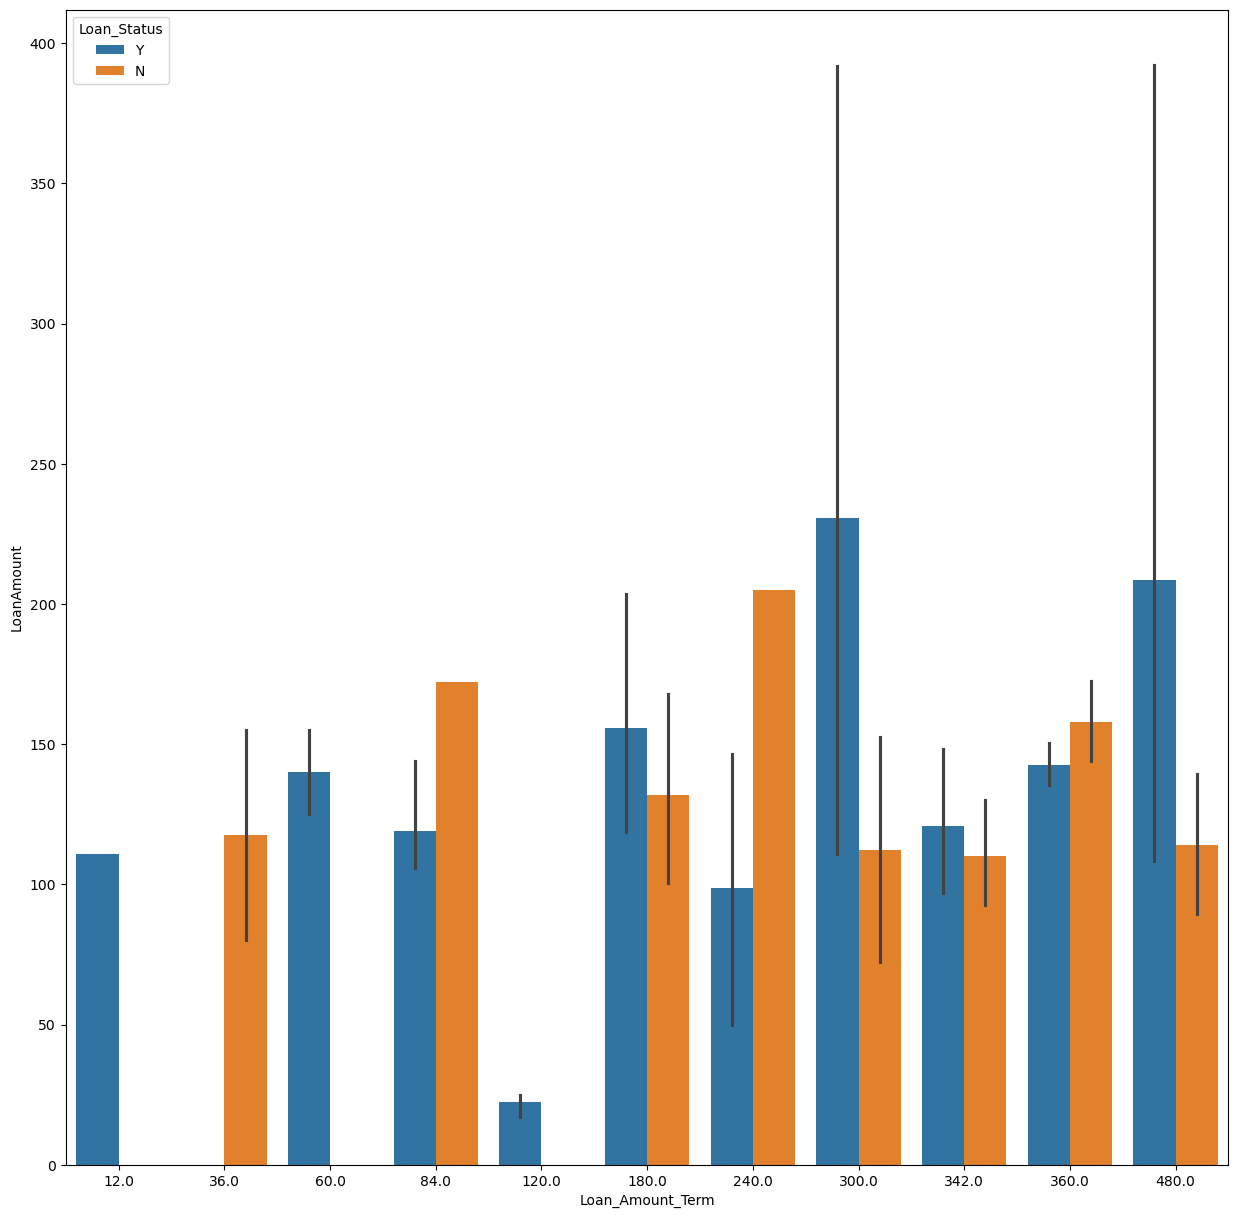

In [73]:
plt.figure(figsize=(15,15))
sns.barplot(loandf,x='Loan_Amount_Term',y='LoanAmount',hue='Loan_Status',dodge=True)
plt.show()

It is clear from the above plot that the loan amount term of 300 and 480 are given more loan amount i.e when the loan amount term increases corresponding loan amount is also increase in the dataset.

# Apply LabelEncoder to encode the categorical data

In [77]:
columns_to_encode=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le=LabelEncoder()
loandf[columns_to_encode]=loandf[columns_to_encode].apply(le.fit_transform)

In [79]:
loandf.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [81]:
loandf['Loan_ID']=loandf['Loan_ID'].str[2:]

In [83]:
loandf.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


# Check for the skewness in the dataset using distplot

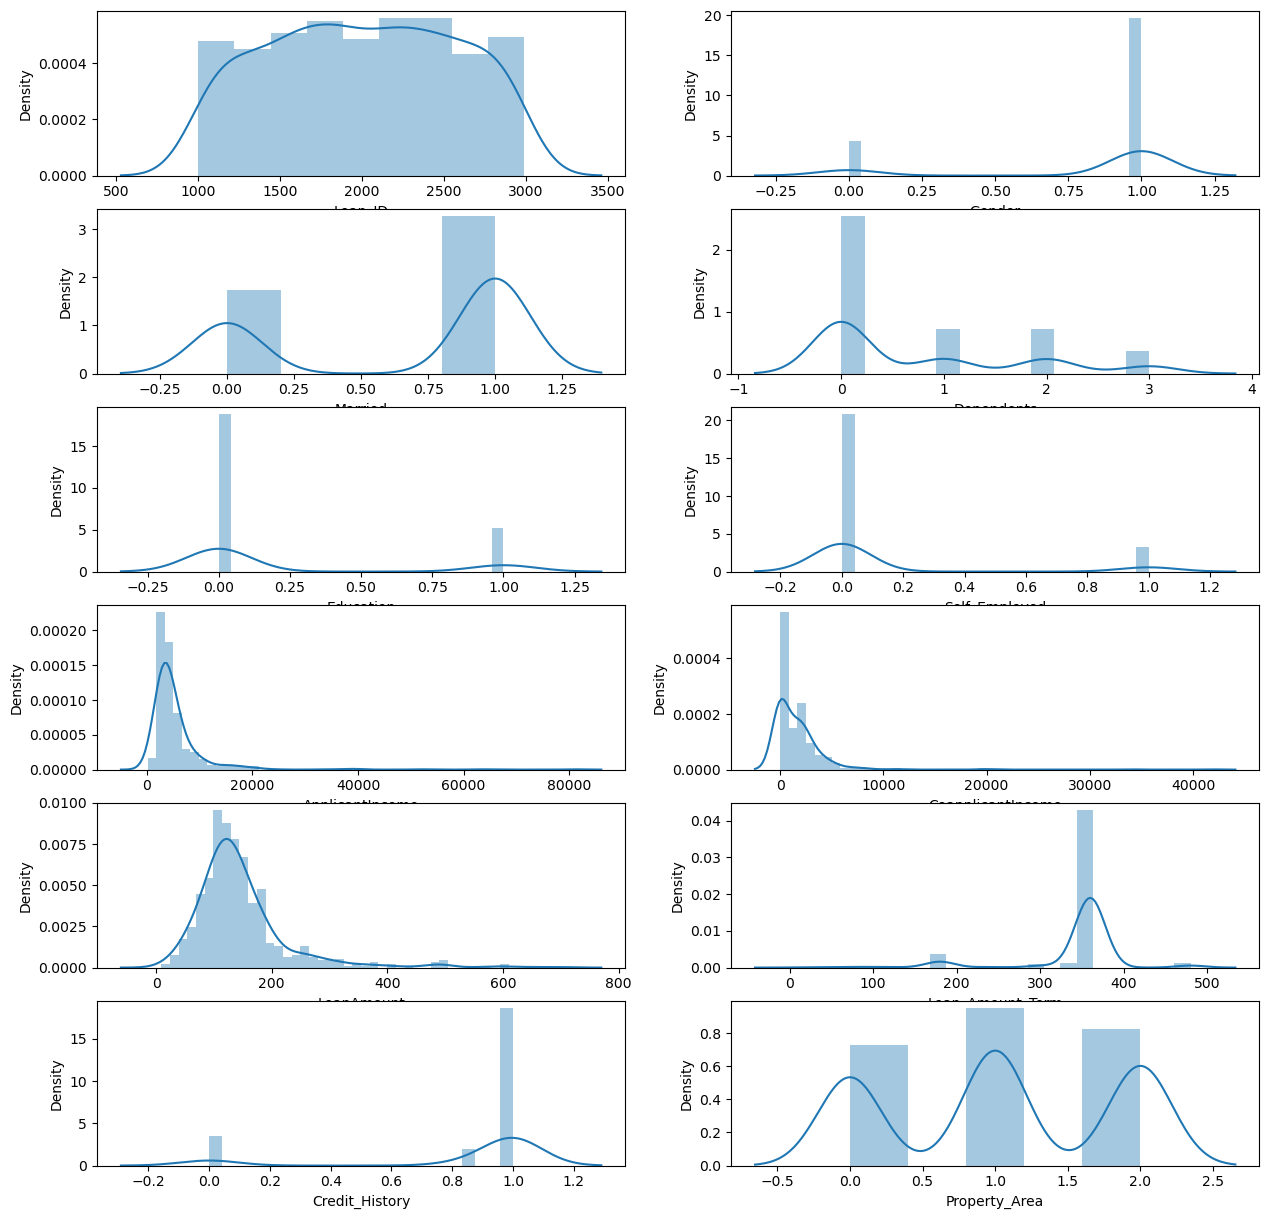

In [86]:
plt.figure(figsize=(15,15))
p=1
for i in loandf:
    if p<=12:
        plt.subplot(6,2,p)
        sns.distplot(loandf[i])
    p=p+1
plt.show()

# check for the skewness in the dataset using skew method

In [89]:
loandf.skew()

Loan_ID             -0.019809
Gender              -1.648795
Married              -0.64485
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term     -2.38968
Credit_History        -1.9636
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: object

# Apply PowerTransformer to remove the skewness in the dataset

In [92]:
columns_to_transform=['Gender','Married','Dependents','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
pt=PowerTransformer()
loandf[columns_to_transform]=pt.fit_transform(loandf[columns_to_transform])

In [94]:
loandf.skew()

Loan_ID             -0.019809
Gender              -1.648795
Married              -0.64485
Dependents           0.441404
Education            1.367622
Self_Employed        2.159796
ApplicantIncome     -0.092946
CoapplicantIncome   -0.145646
LoanAmount           0.024376
Loan_Amount_Term     0.389827
Credit_History      -1.599912
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: object

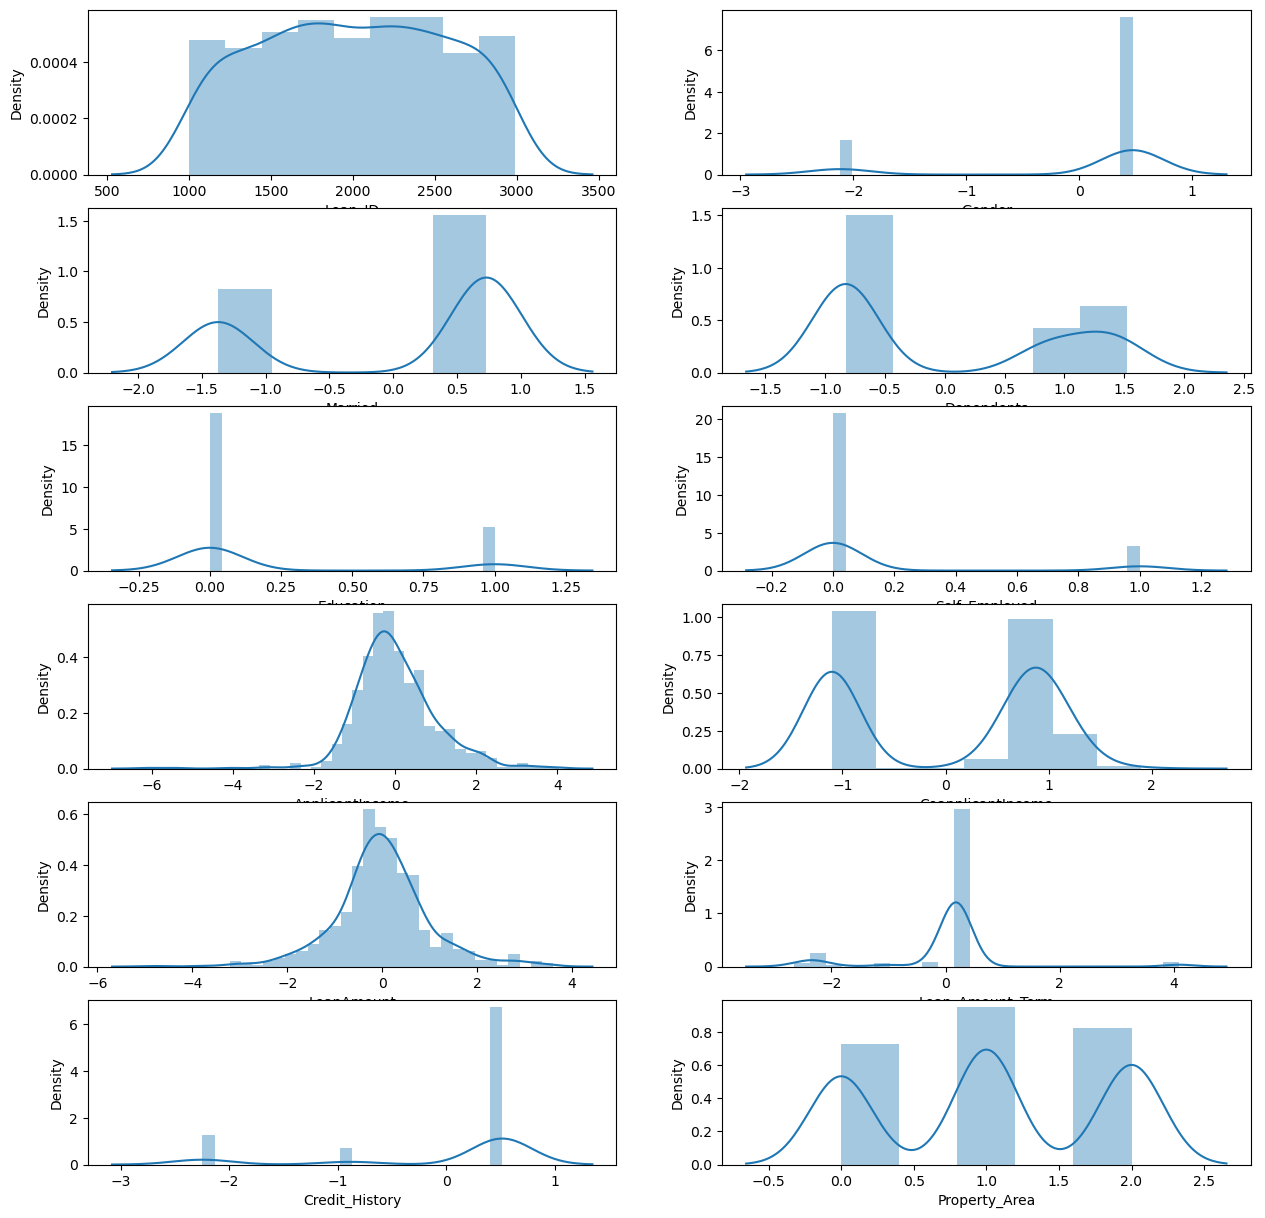

In [96]:
# skewness is removed from dataset
plt.figure(figsize=(15,15))
p=1
for i in loandf:
    if p<=12:
        plt.subplot(6,2,p)
        sns.distplot(loandf[i])
    p=p+1
plt.show()

# Check for the outliers in the dataset using boxplot

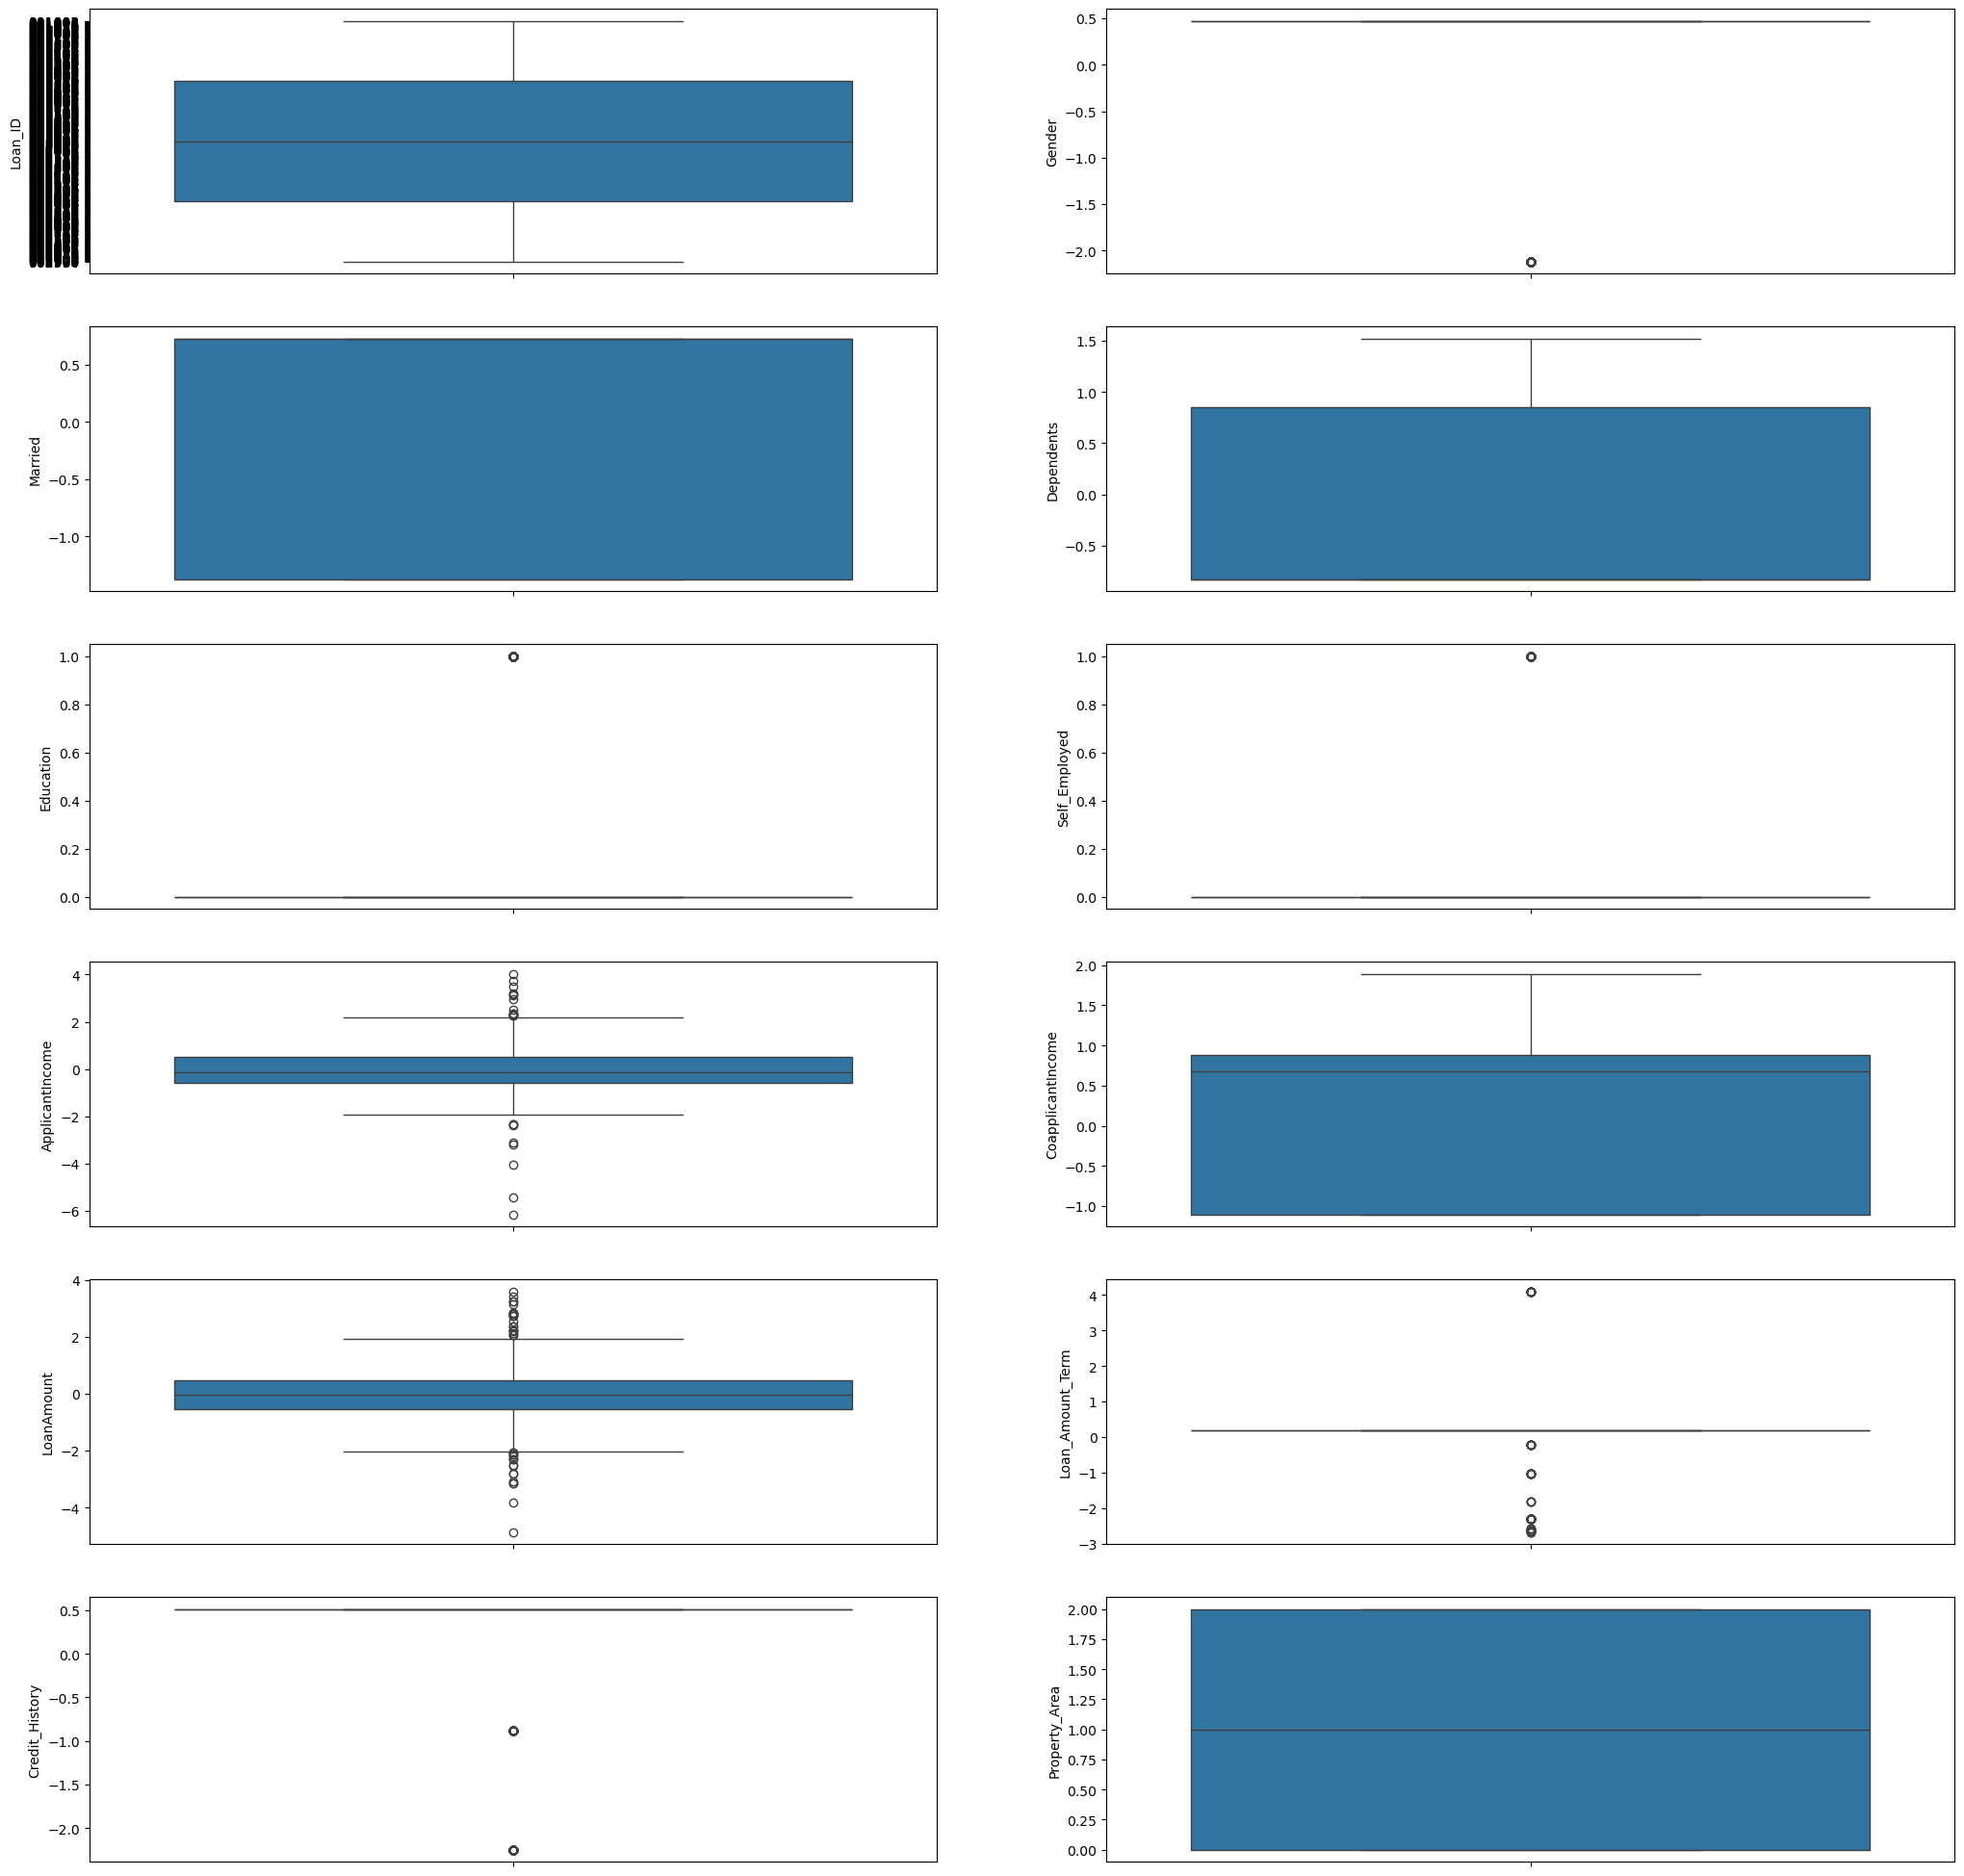

In [99]:
plt.figure(figsize=(25,25))
p=1
for i in loandf:
    if p<=12:
        plt.subplot(6,2,p)
        sns.boxplot(loandf[i])
    p=p+1
plt.show()

In [101]:
loandf=loandf.drop(columns='Loan_ID',axis=1)

# Detect and remove the outliers in the dataset using zscore

In [104]:
z=np.abs(zscore(loandf))
z

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.472343,1.372089,0.827104,0.528362,0.392601,0.544331,1.102837,0.235387,0.185905,0.514063,1.223298,0.674519
1,0.472343,0.728816,0.854259,0.528362,0.392601,0.170974,0.750578,0.037659,0.185905,0.514063,1.318513,1.482537
2,0.472343,0.728816,0.827104,0.528362,2.547117,0.499955,1.102837,1.346305,0.185905,0.514063,1.223298,0.674519
3,0.472343,0.728816,0.827104,1.892641,0.392601,0.743873,0.891686,0.167886,0.185905,0.514063,1.223298,0.674519
4,0.472343,1.372089,0.827104,0.528362,0.392601,0.582817,1.102837,0.158610,0.185905,0.514063,1.223298,0.674519
...,...,...,...,...,...,...,...,...,...,...,...,...
609,2.117107,1.372089,0.827104,0.528362,0.392601,0.554885,1.102837,1.205100,0.185905,0.514063,1.318513,0.674519
610,0.472343,0.728816,1.522278,0.528362,0.392601,0.000290,1.102837,2.293317,2.308570,0.514063,1.318513,0.674519
611,0.472343,0.728816,0.854259,0.528362,0.392601,1.023487,0.208603,1.372409,0.185905,0.514063,1.223298,0.674519
612,0.472343,0.728816,1.316702,0.528362,0.392601,0.931750,1.102837,0.738924,0.185905,0.514063,1.223298,0.674519


In [106]:
np.where(z>3)

(array([ 14,  75,  94, 109, 130, 130, 133, 155, 155, 168, 171, 171, 179,
        185, 188, 216, 228, 248, 293, 298, 333, 358, 366, 369, 378, 409,
        443, 468, 500, 500, 516, 555, 561, 568, 573, 600], dtype=int64),
 array([7, 8, 7, 8, 7, 8, 7, 5, 7, 8, 5, 7, 8, 5, 5, 5, 8, 8, 8, 8, 5, 8,
        8, 7, 8, 5, 5, 5, 5, 8, 8, 7, 7, 7, 8, 5], dtype=int64))

In [108]:
loan_df=loandf[(z<=3).all(axis=1)]
loan_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.472343,-1.372089,-0.827104,0,0,0.544331,-1.102837,0.235387,0.185905,0.514063,2,1
1,0.472343,0.728816,0.854259,0,0,0.170974,0.750578,-0.037659,0.185905,0.514063,0,0
2,0.472343,0.728816,-0.827104,0,1,-0.499955,-1.102837,-1.346305,0.185905,0.514063,2,1
3,0.472343,0.728816,-0.827104,1,0,-0.743873,0.891686,-0.167886,0.185905,0.514063,2,1
4,0.472343,-1.372089,-0.827104,0,0,0.582817,-1.102837,0.158610,0.185905,0.514063,2,1


In [110]:
print("Percentage of data loss",((loandf.shape[0]-loan_df.shape[0])/loandf.shape[0])*100)

Percentage of data loss 5.211726384364821


In [112]:
loandf.shape

(614, 12)

In [114]:
loan_df.shape

(582, 12)

# Heatmap to show the correlation between the features in the dataset

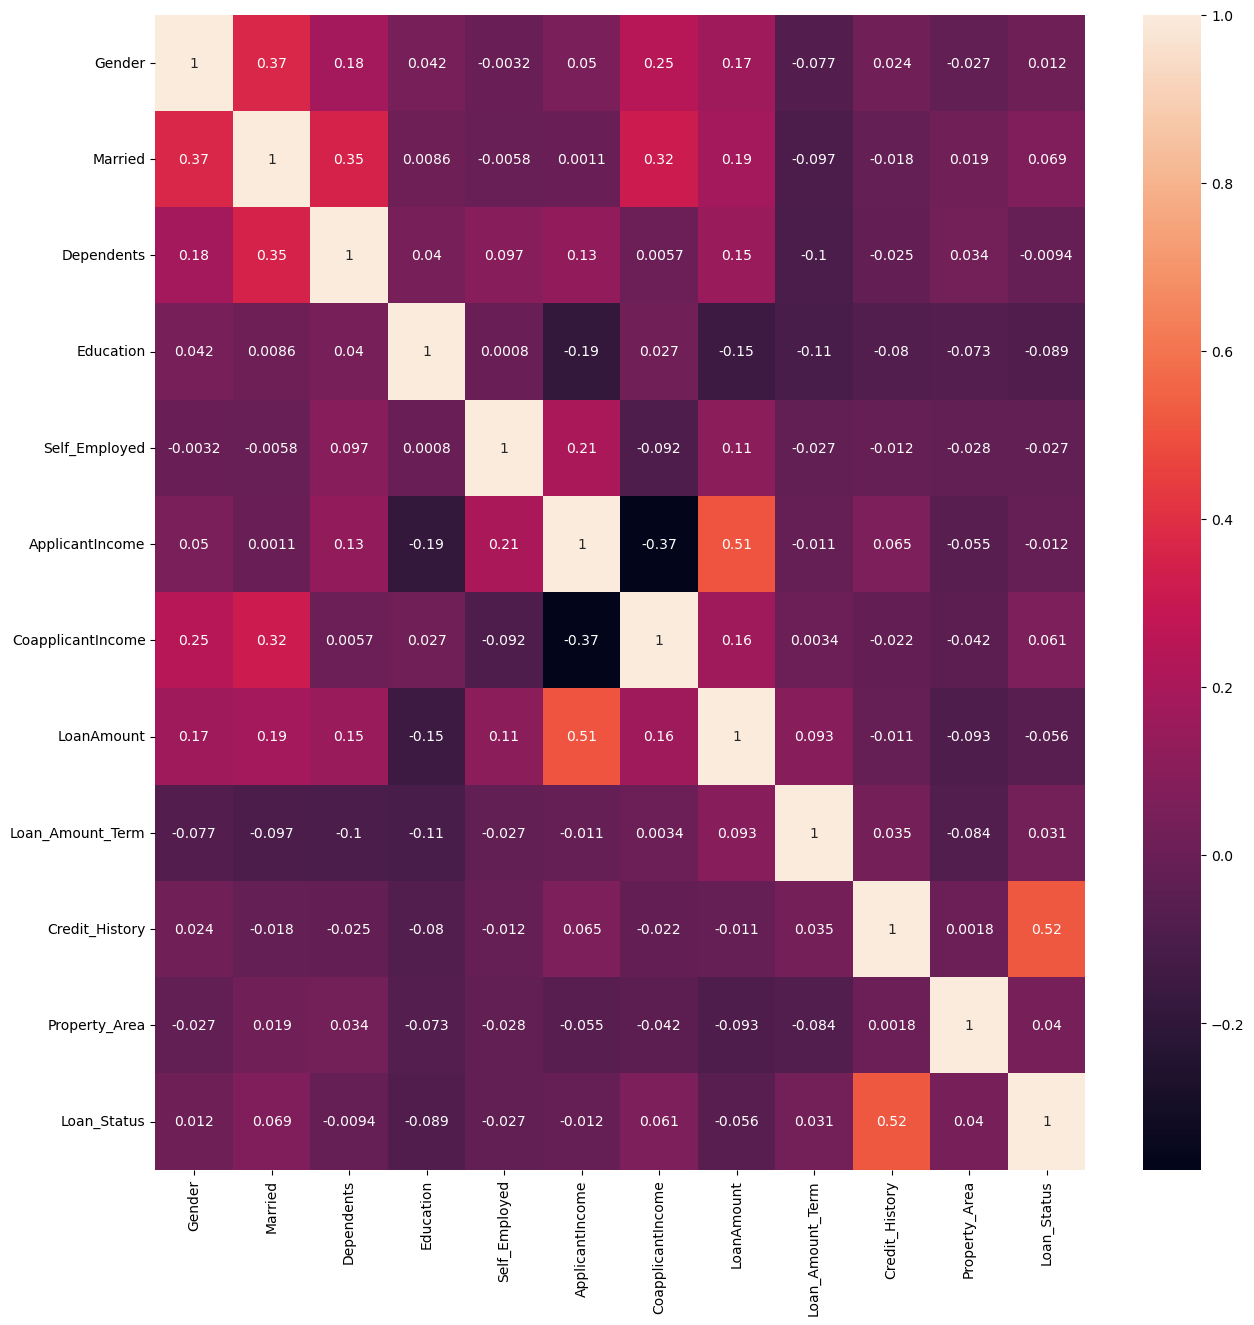

In [116]:
plt.figure(figsize=(15,15))
sns.heatmap(loan_df.corr(),annot=True)
plt.show()

# Pairplot to show the realtionship between each features in the dataset

<Figure size 2500x2500 with 0 Axes>

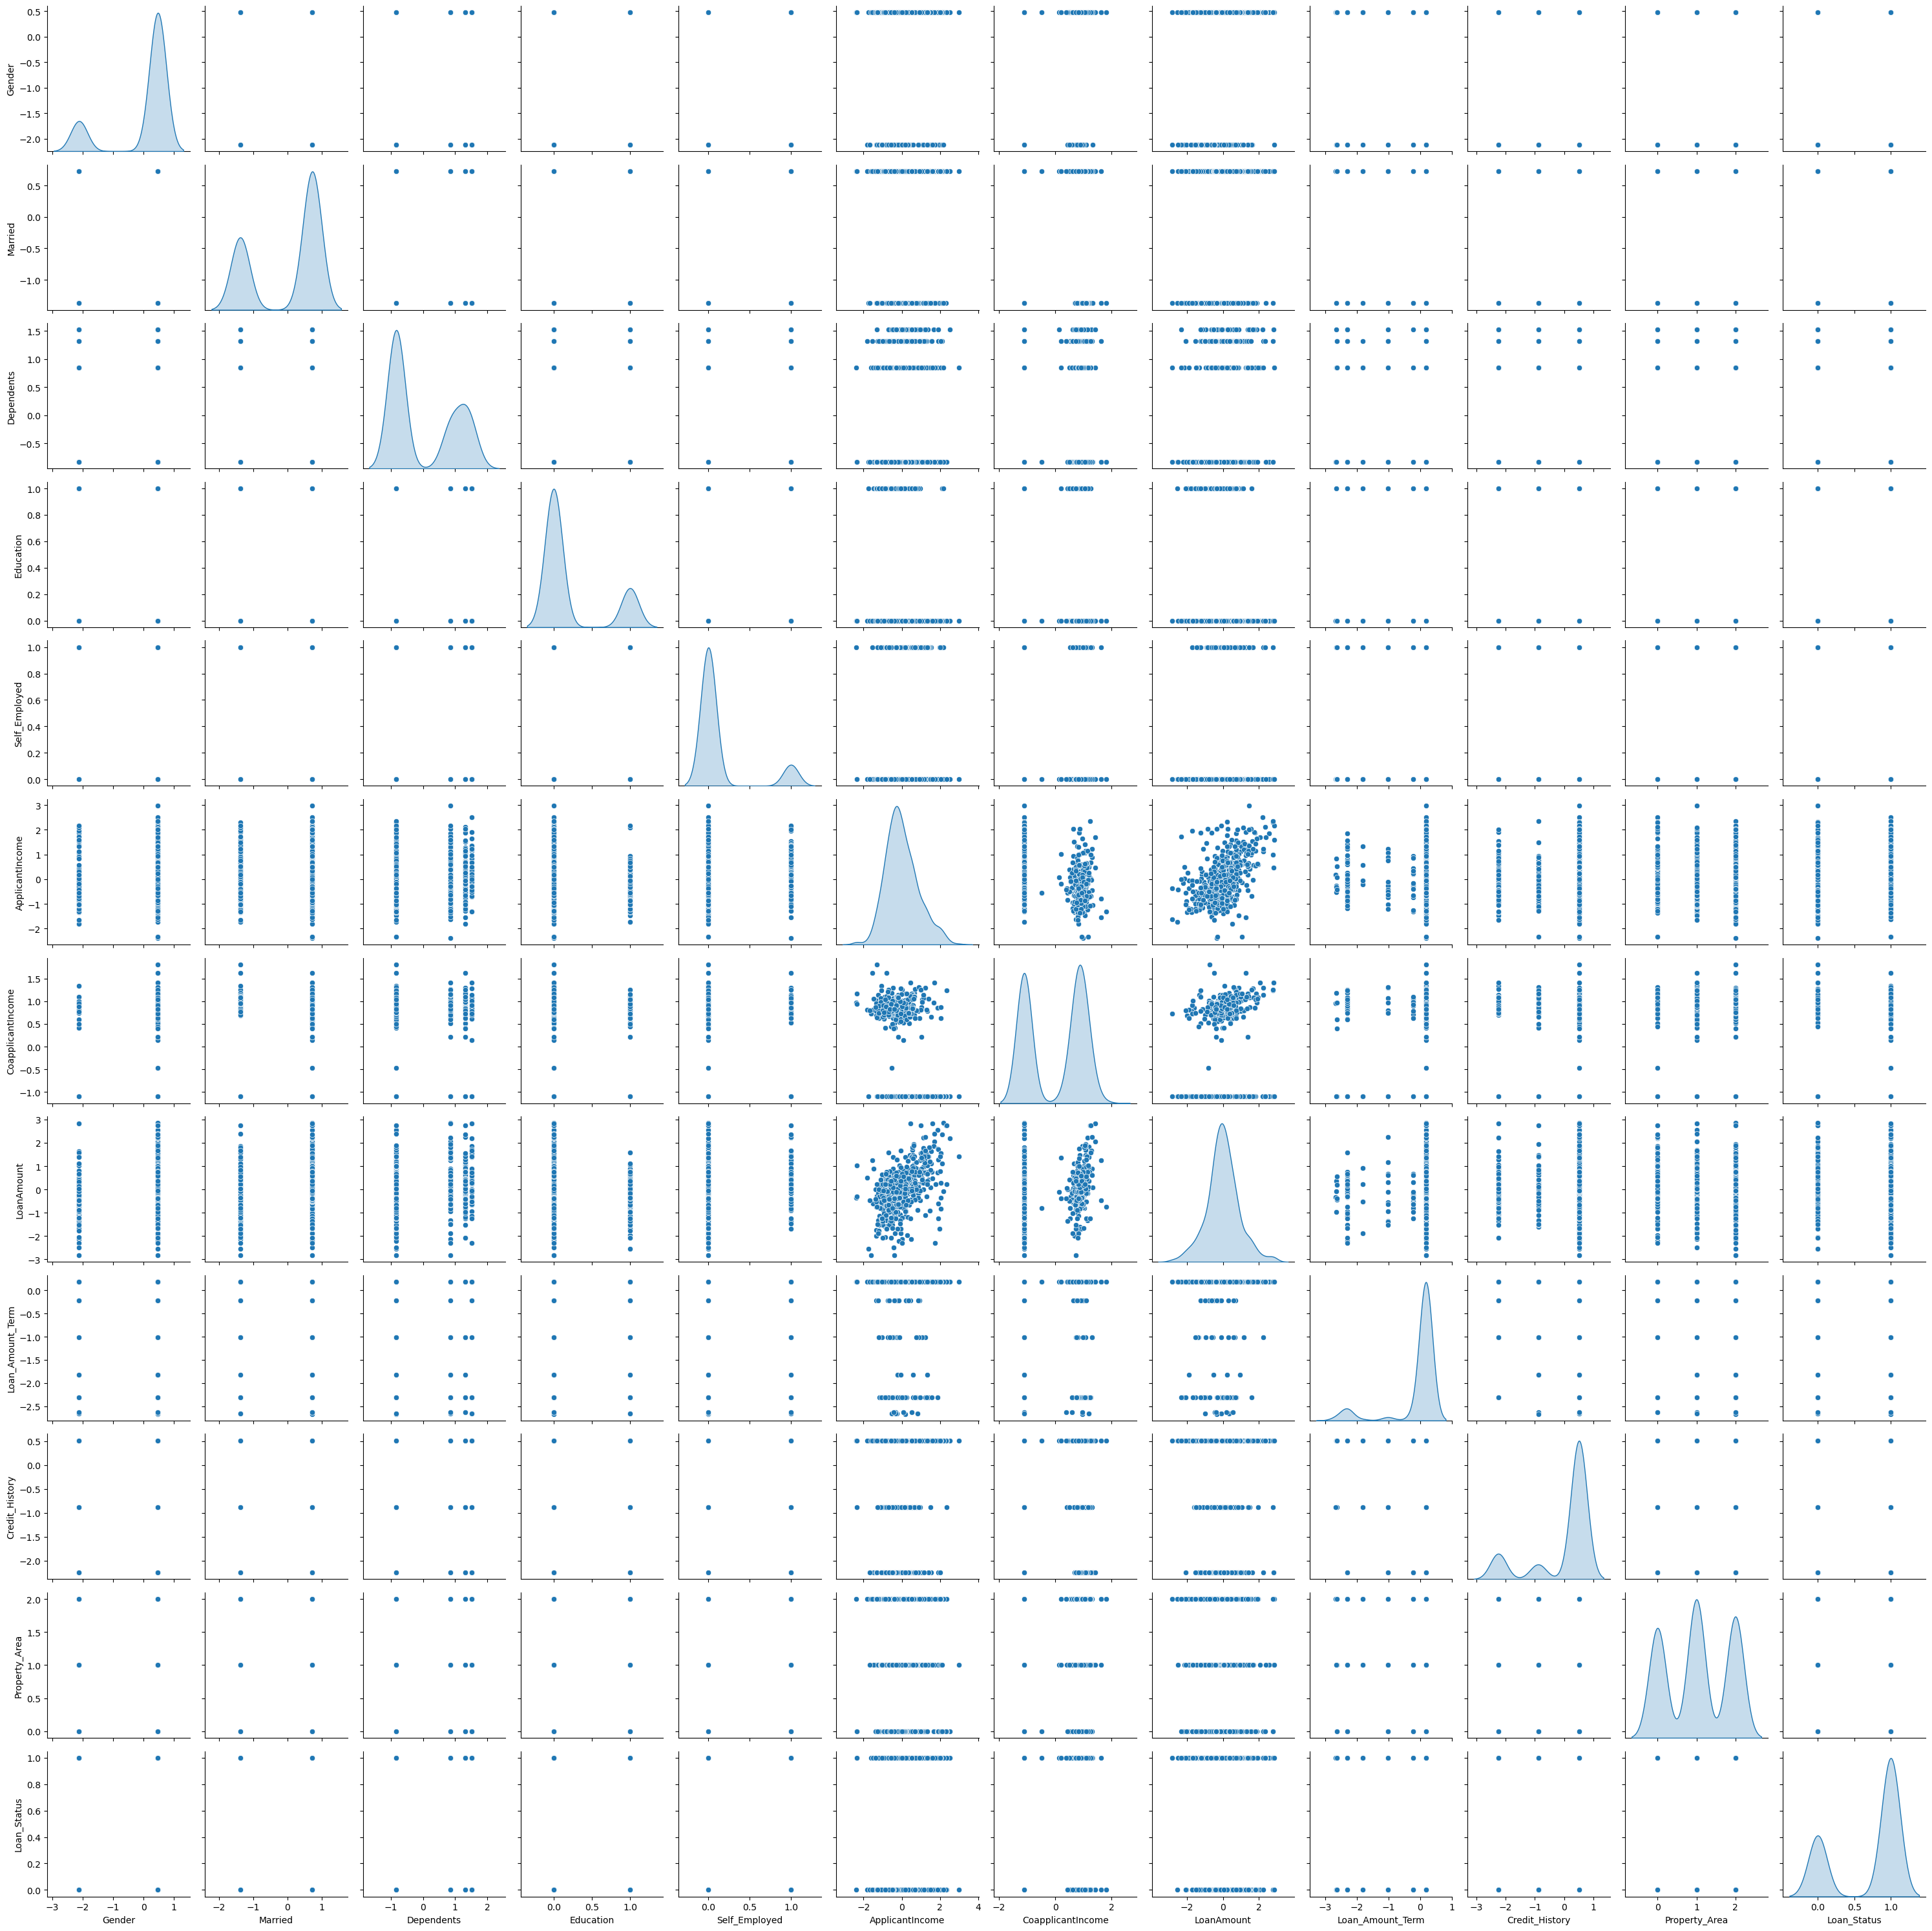

In [295]:
plt.figure(figsize=(25,25))
sns.pairplot(loan_df,diag_kind='kde')
plt.tight_layout()

# Split the data as x(input) and y(label/output)

In [121]:
x=loan_df.drop(columns='Loan_Status',axis=1)
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.472343,-1.372089,-0.827104,0,0,0.544331,-1.102837,0.235387,0.185905,0.514063,2
1,0.472343,0.728816,0.854259,0,0,0.170974,0.750578,-0.037659,0.185905,0.514063,0
2,0.472343,0.728816,-0.827104,0,1,-0.499955,-1.102837,-1.346305,0.185905,0.514063,2
3,0.472343,0.728816,-0.827104,1,0,-0.743873,0.891686,-0.167886,0.185905,0.514063,2
4,0.472343,-1.372089,-0.827104,0,0,0.582817,-1.102837,0.158610,0.185905,0.514063,2


In [123]:
y=loan_df['Loan_Status']
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

# Check for the multicollinearity in the dataset using variance inflation factor

In [126]:
def calc_vif(x):
    df=pd.DataFrame()
    df['Columns']=x.columns
    df['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return df

In [128]:
calc_vif(x)

,Columns,VIF
0,Gender,1.218280
1,Married,1.404679
2,Dependents,1.192614
3,Education,1.201318
4,Self_Employed,1.155062
5,ApplicantIncome,2.012493
6,CoapplicantIncome,1.630310
7,LoanAmount,1.735297
8,Loan_Amount_Term,1.070065
9,Credit_History,1.015618


In [130]:
y.value_counts()

Loan_Status
1    404
0    178
Name: count, dtype: int64

# Balance the dataset using SMOTE over sampling technique

In [135]:
smt=SMOTE()
x_sampled,y_sampled=smt.fit_resample(x,y)

In [137]:
y_sampled.value_counts()

Loan_Status
1    404
0    404
Name: count, dtype: int64

# Apply StandardScaler technique to standardize the dataset

In [311]:
sc=StandardScaler()
x_scales=sc.fit_transform(x_sampled)
x_scaled=pd.DataFrame(x_scales,columns=x_sampled.columns)
x_scaled.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.44861,-1.385185,-0.845770,-0.506567,-0.333792,0.656868,-1.081219,0.256511,0.361787,0.62509,1.291194
1,0.44861,0.730775,0.854116,-0.506567,-0.333792,0.202771,0.770438,-0.053893,0.361787,0.62509,-1.222746
2,0.44861,0.730775,-0.845770,-0.506567,2.995882,-0.613247,-1.081219,-1.541590,0.361787,0.62509,1.291194
3,0.44861,0.730775,-0.845770,1.974074,-0.333792,-0.909912,0.911413,-0.201938,0.361787,0.62509,1.291194
4,0.44861,-1.385185,-0.845770,-0.506567,-0.333792,0.703676,-1.081219,0.169229,0.361787,0.62509,1.291194


# Instantiate the regression models

In [313]:
lr=LogisticRegression()
dtc=DecisionTreeClassifier()
svc=SVC()
knn=KNeighborsClassifier()
rfc=RandomForestClassifier()
bag=BaggingClassifier()
gbc=GradientBoostingClassifier()
ada=AdaBoostClassifier()
extra=ExtraTreesClassifier()


model_names=[(lr,"Logistic Regression"),
             (dtc,"DecisionTreeClassifier"),
             (svc,"SVC"),
             (knn,"KNeighborsClassifier"),
             (rfc,"RandomForestClassifier"),
             (bag,"BaggingClassifier"),
             (gbc,"GradientBoostingClassifier"),
             (ada,"AdaBoostClassifier"),
             (extra,"ExtraTreesClassifier")]

# Perform cross validation for each model to check for the best performing model

In [315]:
models=[lr,dtc,svc,knn,rfc,bag,gbc,ada,extra]

for i in models:
    cvs=cross_val_score(i,x_scaled,y_sampled,scoring='accuracy',cv=5,n_jobs=-1)
    print("Cross validation score for",i,"is",cvs,"\n mean of the cross validation is",np.mean(cvs))

Cross validation score for LogisticRegression() is [0.70987654 0.72839506 0.69135802 0.68322981 0.68944099] 
 mean of the cross validation is 0.7004600874166091
Cross validation score for DecisionTreeClassifier() is [0.7345679  0.74074074 0.79012346 0.70186335 0.73291925] 
 mean of the cross validation is 0.7400429414922168
Cross validation score for SVC() is [0.72839506 0.7037037  0.70987654 0.67080745 0.68944099] 
 mean of the cross validation is 0.7004447511693889
Cross validation score for KNeighborsClassifier() is [0.70987654 0.66666667 0.71604938 0.73913043 0.71428571] 
 mean of the cross validation is 0.7092017483321831
Cross validation score for RandomForestClassifier() is [0.7654321  0.79012346 0.84567901 0.80745342 0.83229814] 
 mean of the cross validation is 0.8081972241392531
Cross validation score for BaggingClassifier() is [0.74691358 0.7962963  0.80864198 0.77639752 0.80745342] 
 mean of the cross validation is 0.7871405567057741
Cross validation score for GradientBoost

# Check for the best random state and maximum accuracy for the best performing model in cross_val_score

In [317]:
maxacc=0
maxrs=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_sampled,test_size=0.30,random_state=i)
    rfc.fit(x_train,y_train)
    y_pred=rfc.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print("Accuracy score is",maxacc,"and random state is",maxrs)

Accuracy score is 0.8847736625514403 and random state is 15


In [319]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_sampled,test_size=0.30,random_state=15)

In [327]:
x_train.shape

(565, 11)

In [329]:
x_test.shape

(243, 11)

In [331]:
y_train.shape

(565,)

In [333]:
y_test.shape

(243,)

# Build and train the different classification models

In [335]:
model_metrics=[]

for model_data,model_name in model_names:
    model_data.fit(x_train,y_train)
    y_pred=model_data.predict(x_test)
    y_pred_train=model_data.predict(x_train)
    r2=r2_score(y_test,y_pred)
    acc_train=accuracy_score(y_train,y_pred_train)
    acc_test=accuracy_score(y_test,y_pred)
    prec_test=precision_score(y_test,y_pred)
    recall_test=recall_score(y_test,y_pred)
    model_perf={"Model name":model_name,"R-Score(Test Data)":r2,"Accuracy Score(Training Data)":acc_train,"Accuracy Score(Test Data)":acc_test,"Precision Score(Test Data)":prec_test,"Recall Score(Test Data)":recall_test}
    model_metrics.append(model_perf)
model_df=pd.DataFrame(model_metrics)
model_df=model_df.sort_values(by='Accuracy Score(Test Data)',ascending=False)
model_df

,Model name,R-Score(Test Data),Accuracy Score(Training Data),Accuracy Score(Test Data),Precision Score(Test Data),Recall Score(Test Data)
4,RandomForestClassifier,0.456707,1.000000,0.864198,0.851562,0.886179
8,ExtraTreesClassifier,0.440244,1.000000,0.860082,0.867769,0.853659
5,BaggingClassifier,0.275610,0.991150,0.818930,0.837607,0.796748
6,GradientBoostingClassifier,0.275610,0.904425,0.818930,0.780142,0.894309
7,AdaBoostClassifier,0.176829,0.807080,0.794239,0.766423,0.853659
3,KNeighborsClassifier,0.127439,0.800000,0.781893,0.777778,0.796748
1,DecisionTreeClassifier,0.110976,1.000000,0.777778,0.805310,0.739837
2,SVC,0.094512,0.791150,0.773663,0.736111,0.861789
0,Logistic Regression,-0.053659,0.679646,0.736626,0.703448,0.829268


In [337]:
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
y_pred_train=rfc.predict(x_train)
print("R-Score",r2_score(y_test,y_pred))
print("Accuracy Score for train data",accuracy_score(y_train,y_pred_train))
print("Accuracy Score for test data",accuracy_score(y_test,y_pred))
print("Precision Score",precision_score(y_test,y_pred))
print("Recall Score",recall_score(y_test,y_pred))

R-Score 0.44024390243902456
Accuracy Score for train data 1.0
Accuracy Score for test data 0.8600823045267489
Precision Score 0.8396946564885496
Recall Score 0.8943089430894309


# Hyperparameter tuning for RandomForestClassifier model

In [339]:
param_grids={"criterion" : ["gini", "entropy", "log_loss"], "max_features" : ["sqrt", "log2", None],"bootstrap":[True,False],"oob_score":[True,False],"class_weight" : ["balanced", "balanced_subsample"]}

In [341]:
param_grids

{'criterion': ['gini', 'entropy', 'log_loss'],
 'max_features': ['sqrt', 'log2', None],
 'bootstrap': [True, False],
 'oob_score': [True, False],
 'class_weight': ['balanced', 'balanced_subsample']}

In [343]:
gscv=GridSearchCV(rfc,param_grids,cv=5,scoring='accuracy',n_jobs=-1)

In [345]:
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2', None],
                         'oob_score': [True, False]},
             scoring='accuracy')

In [347]:
gscv.best_params_

{'bootstrap': True,
 'class_weight': 'balanced',
 'criterion': 'log_loss',
 'max_features': 'sqrt',
 'oob_score': True}

In [349]:
rfc1=RandomForestClassifier(criterion='log_loss',class_weight='balanced',bootstrap=True,max_features='sqrt',oob_score=True)
rfc1.fit(x_train,y_train)
y_predrfc=rfc1.predict(x_test)
y_predrfc

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0])

In [351]:
print("R-Score",r2_score(y_test,y_predrfc))
print("Accuracy Score",accuracy_score(y_test,y_predrfc))
print("Precision Score",precision_score(y_test,y_predrfc))
print("Recall Score",recall_score(y_test,y_predrfc))

R-Score 0.3579268292682929
Accuracy Score 0.8395061728395061
Precision Score 0.828125
Recall Score 0.8617886178861789


In [353]:
y_predict=rfc.predict_proba(x_test)[:,1]
y_predict

array([0.62, 0.72, 0.03, 0.75, 0.79, 0.04, 0.42, 0.78, 0.3 , 0.67, 0.55,
       0.69, 0.55, 0.04, 0.01, 0.02, 0.67, 0.86, 0.72, 0.81, 0.45, 0.06,
       0.11, 0.46, 0.88, 0.74, 0.85, 0.84, 0.06, 0.74, 0.41, 0.17, 0.32,
       0.88, 0.58, 0.77, 0.79, 0.67, 0.57, 0.86, 0.86, 0.02, 0.63, 0.2 ,
       0.12, 0.  , 0.84, 0.6 , 0.91, 0.91, 0.82, 0.31, 0.48, 0.32, 0.03,
       0.78, 0.1 , 0.  , 0.34, 0.96, 0.78, 0.64, 0.02, 0.96, 0.21, 0.82,
       0.78, 0.17, 0.09, 0.81, 0.09, 0.77, 0.54, 0.47, 0.11, 0.  , 0.15,
       0.36, 0.05, 0.96, 0.62, 0.88, 0.27, 0.56, 0.04, 0.35, 0.04, 0.48,
       0.7 , 0.55, 0.52, 0.54, 0.03, 0.03, 0.94, 0.91, 0.67, 0.11, 0.66,
       0.57, 0.67, 0.41, 0.25, 0.77, 0.74, 0.02, 0.38, 0.02, 0.52, 0.4 ,
       0.05, 0.17, 0.88, 0.67, 0.74, 0.62, 0.23, 0.78, 0.59, 0.53, 0.6 ,
       0.78, 0.03, 0.85, 0.16, 0.08, 0.29, 0.09, 0.65, 0.66, 0.83, 0.28,
       0.5 , 0.43, 0.65, 0.67, 0.72, 0.02, 0.82, 0.79, 0.54, 0.66, 0.12,
       0.12, 0.81, 0.74, 0.53, 0.04, 0.68, 0.77, 0.

In [355]:
fpr,tpr,threshold=roc_curve(y_test,y_pred)

In [357]:
fpr

array([0.   , 0.175, 1.   ])

In [359]:
tpr

array([0.        , 0.89430894, 1.        ])

In [361]:
threshold

array([inf,  1.,  0.])

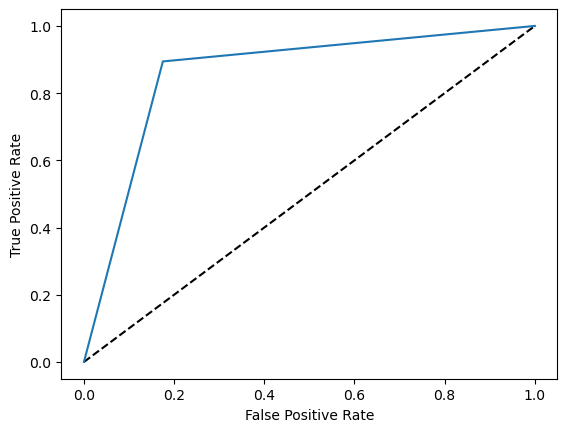

In [363]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="RandomForestClassifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [365]:
auc_score=roc_auc_score(y_test,y_pred)
auc_score

0.8596544715447154

# Save the best model

In [367]:
import pickle

filename='LoanStatus.pkl'
pickle.dump(rfc,open(filename,'wb'))

# Load the model

In [369]:
import pickle

model=pickle.load(open('LoanStatus.pkl','rb'))
model.predict(x_test)

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0])

# Test the model

In [371]:
a=np.array(y_test)
df1=pd.DataFrame()
df1["Actual Output"]=a
df1["Predicted Output"]=y_pred
df1

,Actual Output,Predicted Output
0,1,1
1,1,1
2,0,0
3,1,1
4,1,1
...,...,...
238,1,1
239,1,1
240,1,1
241,0,0


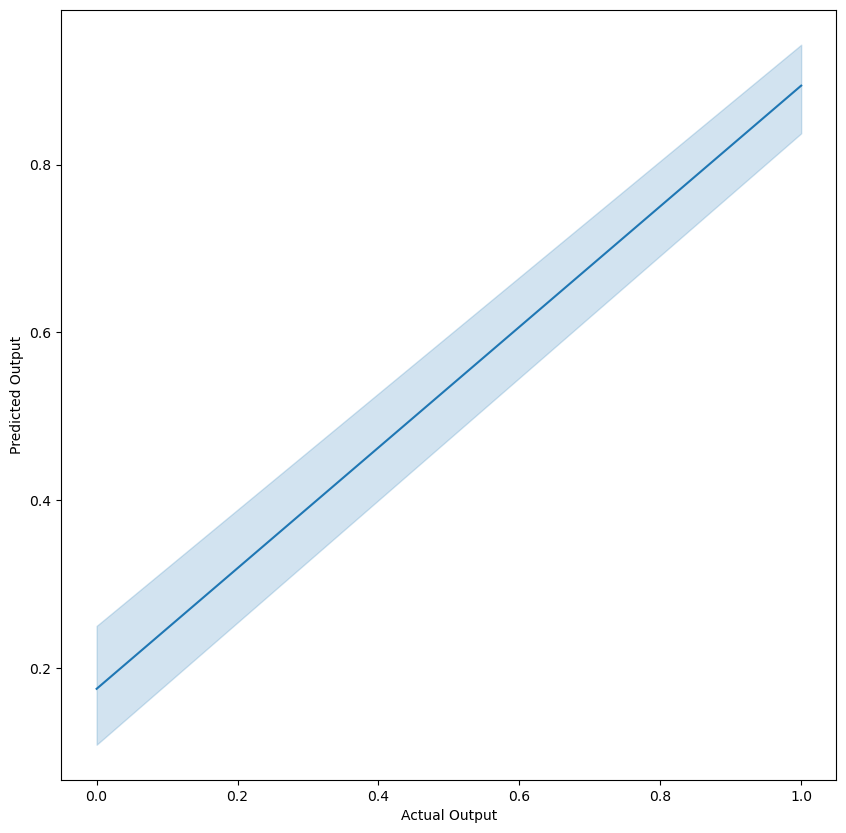

In [379]:
plt.figure(figsize=(10,10))
sns.lineplot(df1,x=a,y=y_pred)
plt.xlabel("Actual Output")
plt.ylabel("Predicted Output")
plt.show()

The result from the lineplot shows that when the actual output increases predicted output also increase and this shows the RandomForestClassifier model performs better compared to other classification models.